In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def plot_labels(df, label_column='label'):
    print('Classes: {}'.format(len(df[label_column].unique())))
    print('Examples:')
    dist = df[label_column].value_counts().to_dict()
    for label in sorted(dist.keys()):
        print('\t{}: {} ({:.2%})'.format(label, dist[label], dist[label]/len(df)))
    s_labels = df[label_column].value_counts()
    plt.bar(x=s_labels.index, height=s_labels.values, tick_label=s_labels.index)
    plt.show()

def describe(s_text):
    text_desc = s_text.describe()
    return '\tText lengths: {:.2f} +/- {:.2f}; [{} (min), {} (25%), {} (50%), {} (75%), {} (max)]'.format(
        text_desc['mean'], text_desc['std'], text_desc['min'],
        text_desc['25%'], text_desc['50%'], text_desc['75%'], text_desc['max'])
    
def plot_text(df, label_column='label', text_column='text', bins=30):
    s_text = df[text_column].apply(lambda x: len(x.split(' ')))
    s_text.hist(bins=bins)
    plt.show()
    print(describe(s_text))
    for label in df[label_column].unique():
        s_text = df[df[label_column] == label][text_column].apply(lambda x: len(x.split(' ')))
        s_text.hist(alpha=0.3)
        print(describe(s_text), label)
    plt.legend([i for i in df[label_column].unique()])
    plt.show()
    

# Validation task

# SentimentAnalysis

Classes: 2
Examples:
	negative: 713 (26.16%)
	positive: 2013 (73.84%)


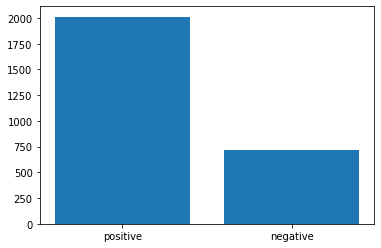

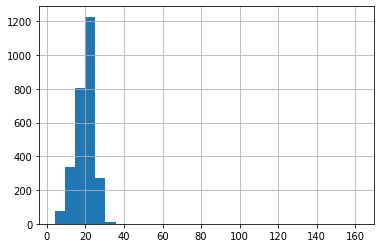

	Text lengths: 19.81 +/- 5.55; [4.0 (min), 17.0 (25%), 20.0 (50%), 23.0 (75%), 162.0 (max)]
	Text lengths: 19.69 +/- 5.79; [4.0 (min), 17.0 (25%), 20.0 (50%), 23.0 (75%), 162.0 (max)] positive
	Text lengths: 20.14 +/- 4.79; [4.0 (min), 17.0 (25%), 21.0 (50%), 24.0 (75%), 35.0 (max)] negative


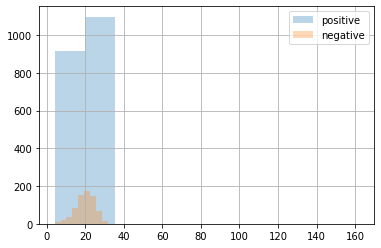

In [3]:
def load_sentiment_analysis():
    df = pd.read_csv('../data/sem_eval_2015/tweets_output.txt',header=None, sep='\t', names=['ID1', 'ID2', 'label','sentence'])
    df = df[df.label != 'neutral']
    df = df[df.label != 'objective']
    df = df[df.label != 'objective-OR-neutral']
    df.rename(columns={'sentence': 'text'}, inplace=True)
    return df

df_sentiment = load_sentiment_analysis()
plot_labels(df_sentiment)
plot_text(df_sentiment)

# Test tasks

## IronySubtaskA


Classes: 2
Examples:
	Ironic: 1901 (49.80%)
	Non-ironic: 1916 (50.20%)


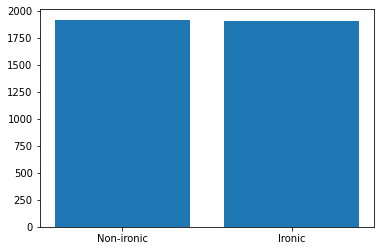

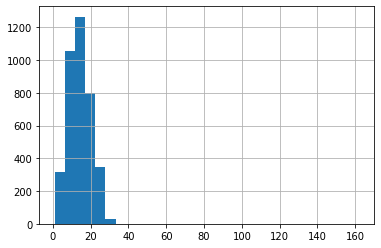

	Text lengths: 14.38 +/- 6.35; [1.0 (min), 10.0 (25%), 14.0 (50%), 19.0 (75%), 162.0 (max)]
	Text lengths: 14.65 +/- 5.94; [2.0 (min), 10.0 (25%), 14.0 (50%), 19.0 (75%), 31.0 (max)] Ironic
	Text lengths: 14.12 +/- 6.72; [1.0 (min), 9.0 (25%), 13.0 (50%), 18.0 (75%), 162.0 (max)] Non-ironic


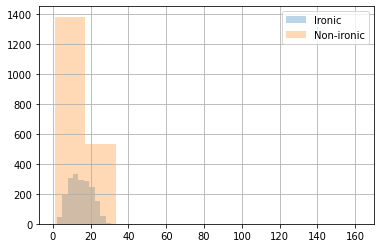

In [4]:
def load_irony_a():
    df = pd.read_csv('../data/sem_eval_2018/SemEval2018-T3-train-taskA.txt', sep='\t', header=0, names=['Tweet_index', 'Label', 'Tweet_text'])
    classes_irony_a = {
        0: 'Non-ironic',
        1: 'Ironic'
    }
    df.rename(columns={'Label': 'label', 'Tweet_text': 'text'}, inplace=True)
    df.label = df.label.apply(lambda x: classes_irony_a[x])
    return df

df_irnoy_a = load_irony_a()
plot_labels(df_irnoy_a)
plot_text(df_irnoy_a)

## IronySubtaskB


Classes: 4
Examples:
	Non-ironic: 1916 (50.20%)
	Other: 202 (5.29%)
	Polarity contrast: 1383 (36.23%)
	Situational: 316 (8.28%)


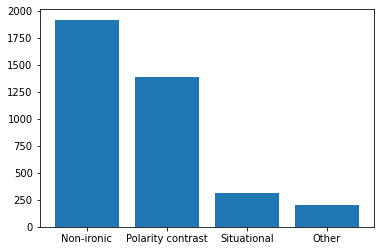

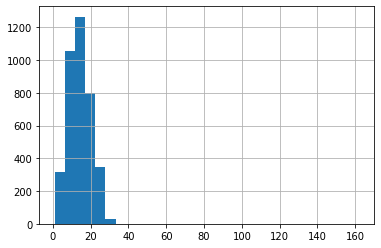

	Text lengths: 14.38 +/- 6.35; [1.0 (min), 10.0 (25%), 14.0 (50%), 19.0 (75%), 162.0 (max)]
	Text lengths: 13.99 +/- 5.97; [2.0 (min), 9.0 (25%), 13.0 (50%), 18.0 (75%), 31.0 (max)] Polarity contrast
	Text lengths: 14.12 +/- 6.72; [1.0 (min), 9.0 (25%), 13.0 (50%), 18.0 (75%), 162.0 (max)] Non-ironic
	Text lengths: 17.61 +/- 4.93; [3.0 (min), 15.0 (25%), 18.0 (50%), 21.0 (75%), 29.0 (max)] Situational
	Text lengths: 14.50 +/- 5.81; [2.0 (min), 10.0 (25%), 14.0 (50%), 19.0 (75%), 29.0 (max)] Other


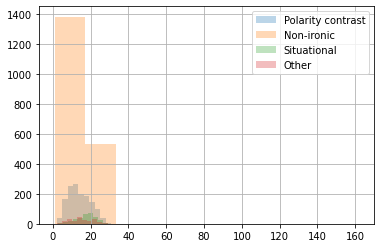

In [5]:
def load_irony_b():
    df = pd.read_csv('../data/sem_eval_2018/SemEval2018-T3-train-taskB.txt', sep='\t', header=0, names=['Tweet_index', 'Label', 'Tweet_text'])
    classes_irony_b = {
        0: 'Non-ironic',
        1: 'Polarity contrast',
        2: 'Situational',
        3: 'Other'
    }
    df.rename(columns={'Label': 'label', 'Tweet_text': 'text'}, inplace=True)
    df.label = df.label.apply(lambda x: classes_irony_b[x])
    return df

df_irnoy_b = load_irony_b()
plot_labels(df_irnoy_b)
plot_text(df_irnoy_b)

## Abuse

Classes: 3
Examples:
	0: 1939 (11.97%)
	1: 3148 (19.43%)
	2: 11115 (68.60%)


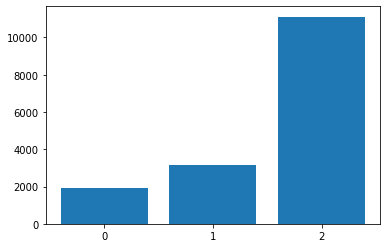

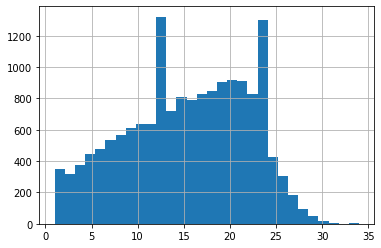

	Text lengths: 15.28 +/- 6.60; [1.0 (min), 10.0 (25%), 16.0 (50%), 21.0 (75%), 34.0 (max)]
	Text lengths: 14.34 +/- 6.79; [1.0 (min), 9.0 (25%), 15.0 (50%), 20.0 (75%), 34.0 (max)] 2
	Text lengths: 18.17 +/- 4.02; [3.0 (min), 16.0 (25%), 18.0 (50%), 21.0 (75%), 29.0 (max)] 0
	Text lengths: 16.81 +/- 6.39; [2.0 (min), 12.0 (25%), 17.5 (50%), 22.0 (75%), 31.0 (max)] 1


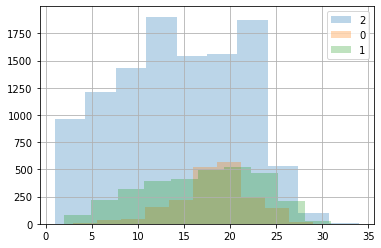

In [6]:
def load_abuse():
    df = pd.read_csv('../data/tweet_wassem/twitter_data_waseem_hovy.csv', sep=',', header=0, names=['Tweet_index', 'Tweet_text', 'Label'])
    df.rename(columns={'Label': 'label', 'Tweet_text': 'text'}, inplace=True)
    return df

df_abuse = load_abuse()
plot_labels(df_abuse)
plot_text(df_abuse)

## Politeness

Classes: 3
Examples:
	Impolite: 1089 (25.02%)
	Neutral: 2175 (49.97%)
	Polite: 1089 (25.02%)


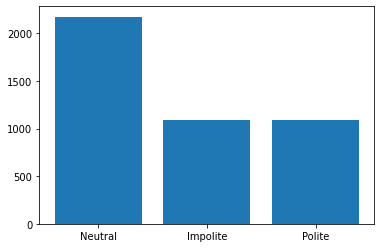

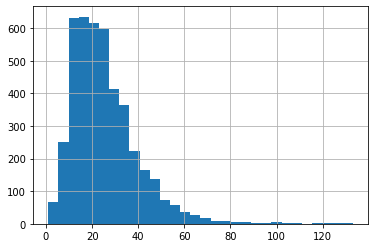

	Text lengths: 25.37 +/- 14.31; [1.0 (min), 15.0 (25%), 22.0 (50%), 32.0 (75%), 133.0 (max)]
	Text lengths: 24.44 +/- 14.75; [1.0 (min), 14.0 (25%), 21.0 (50%), 33.0 (75%), 104.0 (max)] Impolite
	Text lengths: 25.76 +/- 14.29; [3.0 (min), 16.0 (25%), 23.0 (50%), 32.0 (75%), 129.0 (max)] Polite
	Text lengths: 25.65 +/- 14.08; [2.0 (min), 16.0 (25%), 23.0 (50%), 32.0 (75%), 133.0 (max)] Neutral


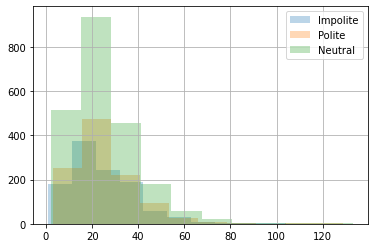

In [7]:
def load_politeness():
    df = pd.read_csv('../data/stanford_politeness_2013/wikipedia-politeness-corpus.csv')
    mapping = {
        -1: 'Impolite',
        0: 'Neutral',
        1: 'Polite'
    }
    df.label = df.label.apply(lambda x: mapping[x])
    return df

df_politeness = load_politeness()
plot_labels(df_politeness)
plot_text(df_politeness)